# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/03/12/45a714482b9aa23cf708c5d07810d8133c4277b9d28db55e51352a0cb2da/folium-0.18.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/fc/be/720f85abacd654ec86f1431bc7c004eae74417bd9d0e7a2bc43601062627/branca-0.8.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 389.1 kB/s eta 0:00:00a 0:00:01


In [3]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [5]:
import numpy as np

import pandas as pd  # your favorite data package
import seaborn as sns  # your favorite visualization package

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [145]:
df = pd.read_csv("train.csv")
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [147]:
df = df.drop(columns=['dropoff_datetime'])
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  
0               40.765602                  N            455  
1               40.731152                  N            663  
2               40.710087                  N           2124  
3               40.706718                  N            429  
4               40.782520                  N            435  
...                   ...                ...            ...  
1458639         40.740170                  N            778  
1458640         40.796547                  N            655  
1458641         40.707371                  N            764  
1458642         40.757107                  N            373  
1458643         40.790585                  N            198  

[1458644 rows x 10 columns]

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

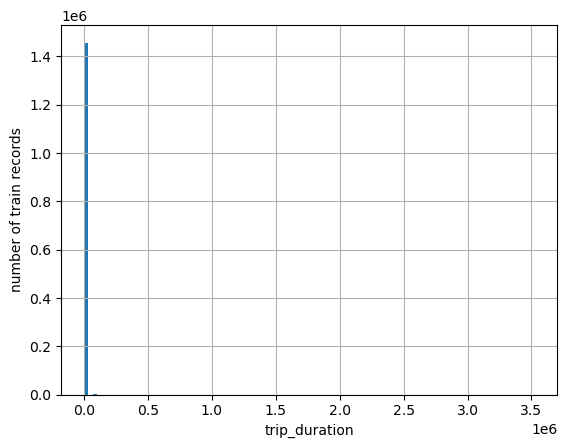

In [149]:
import matplotlib.pyplot as plt
plt.hist(df['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.grid()
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Эта гистограмма получилась не очень информативной, так как шкала trip_duration слишком длинная, а значения в основном лежат в небольшом промежутке относительно этой шкалы. Такое возникает из-за того, что есть выбросы.

Теперь видим, что распределение вполне разумное, самое частое значение логарифма времени поездки лежит в интервале (6, 7)

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Мы увидели, что из-за выбросов распределение было не очень информативно, а поскольку MSE неустойчива к выбросам, она получится большой даже на хорошей модели. Логарифм сглаживает выбросы, за счет чего ошибка будет более информативной.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 
$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y_i} - \log{(\exp(\hat{a}(x_i)) - 1 + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y_i} - \log{(\exp(\hat{a}(x_i)))}\big)^2} =$
$= \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y_i} - \hat{a}(x_i)\big)^2} = \text{RMSE}(X, \hat{y}, \hat{a})$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

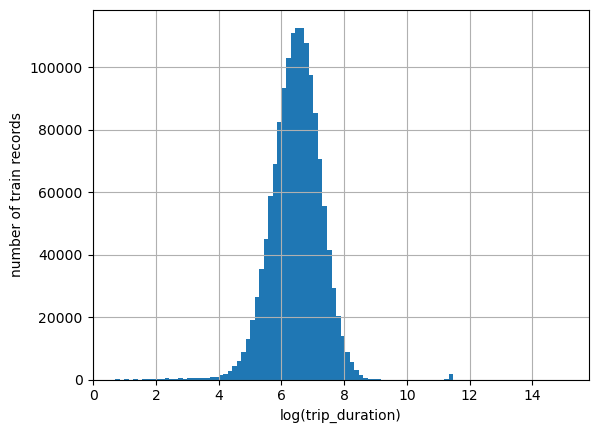

In [151]:
df['log_trip_duration'] = np.log1p(df['trip_duration'].values)
plt.hist(df['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.grid()
plt.show()

In [153]:
df = df.drop(columns=['trip_duration'])
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  
0               40.765602                  N           6.122493  
1               40.731152                  N           6.498282  
2               40.710087                  N           7.661527  
3               40.706718                  N           6.063785  
4               40.782520                  N           6.077642  
...                   ...                ...                ...  
1458639         40.740170                  N           6.658011  
1458640         40.796547                  N           6.486161  
1458641         40.707371                  N           6.639876  
1458642         40.757107                  N           5.924256  
1458643         40.790585                  N           5.293305  

[1458644 rows x 10 columns]

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [48]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred)**2))

rmsle_best_const = rmsle(df['log_trip_duration'], np.mean(df['log_trip_duration']))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

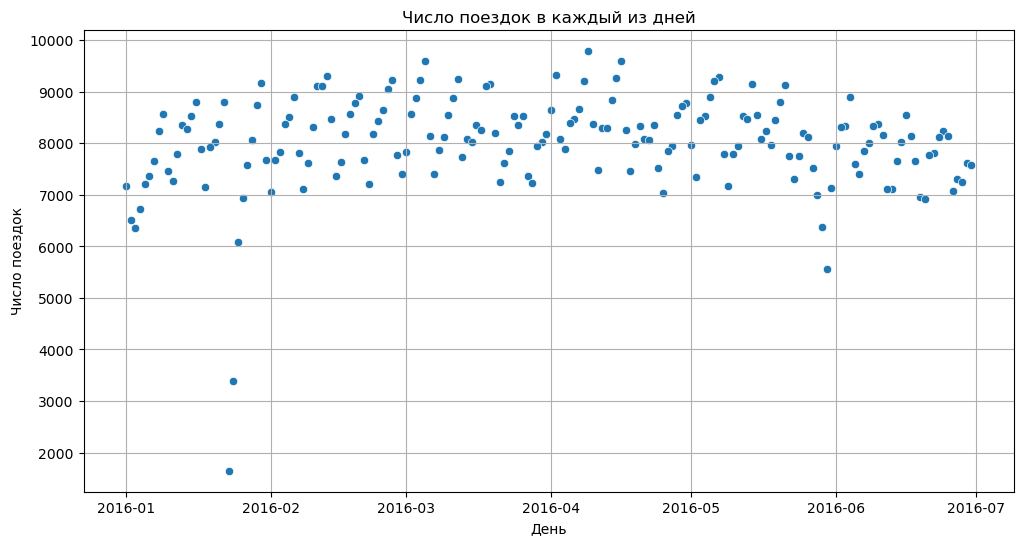

In [155]:
dates = df['pickup_datetime'].dt.date.to_frame().sort_index()
dates = dates['pickup_datetime'].value_counts().to_frame().reset_index()
dates.columns = ['pickup_date', 'count']
plt.figure(figsize=(12,6)) 
sns.scatterplot(data=dates, x='pickup_date', y='count')
plt.title('Число поездок в каждый из дней')
plt.xlabel('День')
plt.ylabel('Число поездок')
plt.grid()
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [94]:
dates = dates.sort_values(by='count')
dates[:10]

pickup_date  count
181  2016-01-23   1648
180  2016-01-24   3383
179  2016-05-30   5570
178  2016-01-25   6084
177  2016-01-03   6353
176  2016-05-29   6372
175  2016-01-02   6512
174  2016-01-04   6725
173  2016-06-20   6910
172  2016-01-26   6941

Первый период: 23-25 января (23 января самое низкое количество). Это было связано с огромной снежной бурей, когда власти запретили автомобильное движение из-за непогоды

Второй период: 29-30 мая (преимущественно 30). Последний понедельник месяца в мае - это день памяти (как раз 30 число в 2016). В Нью-Йорке проходили парады, поэтому, скорее всего, трафик снизился.

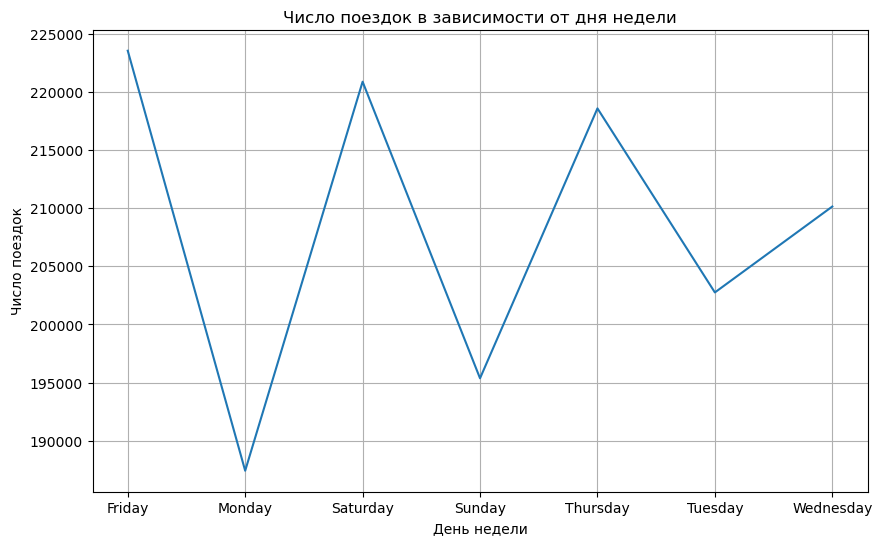

In [215]:
dates = df['pickup_datetime'].dt.day_name().to_frame().sort_index()
dates = dates.value_counts().to_frame().reset_index().sort_values(by='pickup_datetime')
plt.figure(figsize=(10,6)) 
sns.lineplot(data=dates, x='pickup_datetime', y='count')
plt.title('Число поездок в зависимости от дня недели')
plt.xlabel('День недели')
plt.ylabel('Число поездок')
plt.grid()
plt.show()

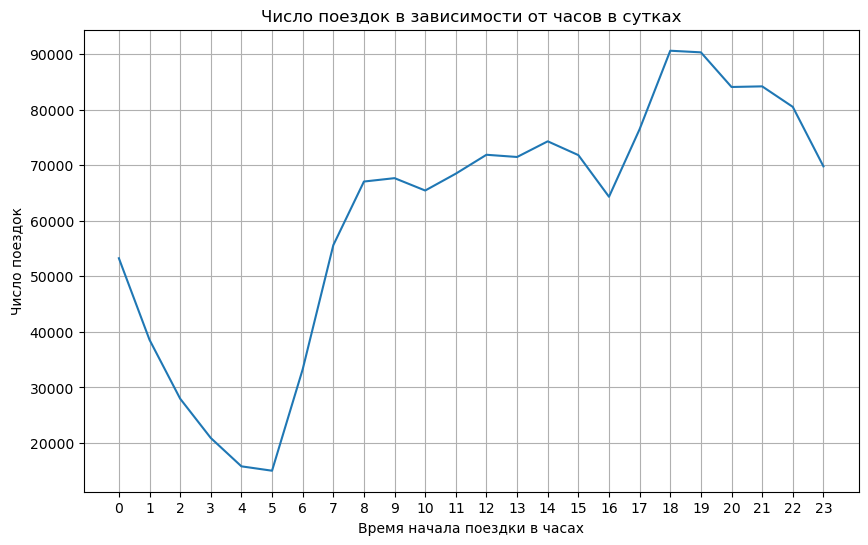

In [217]:
hours = df['pickup_datetime'].dt.hour.to_frame().sort_index()
hours = hours.value_counts().to_frame().reset_index().sort_values(by='pickup_datetime')
plt.figure(figsize=(10,6)) 
sns.lineplot(data=hours, x='pickup_datetime', y='count')
plt.xticks(np.arange(0, 24, step=1))
plt.title('Число поездок в зависимости от часов в сутках')
plt.xlabel('Время начала поездки в часах')
plt.ylabel('Число поездок')
plt.grid()
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

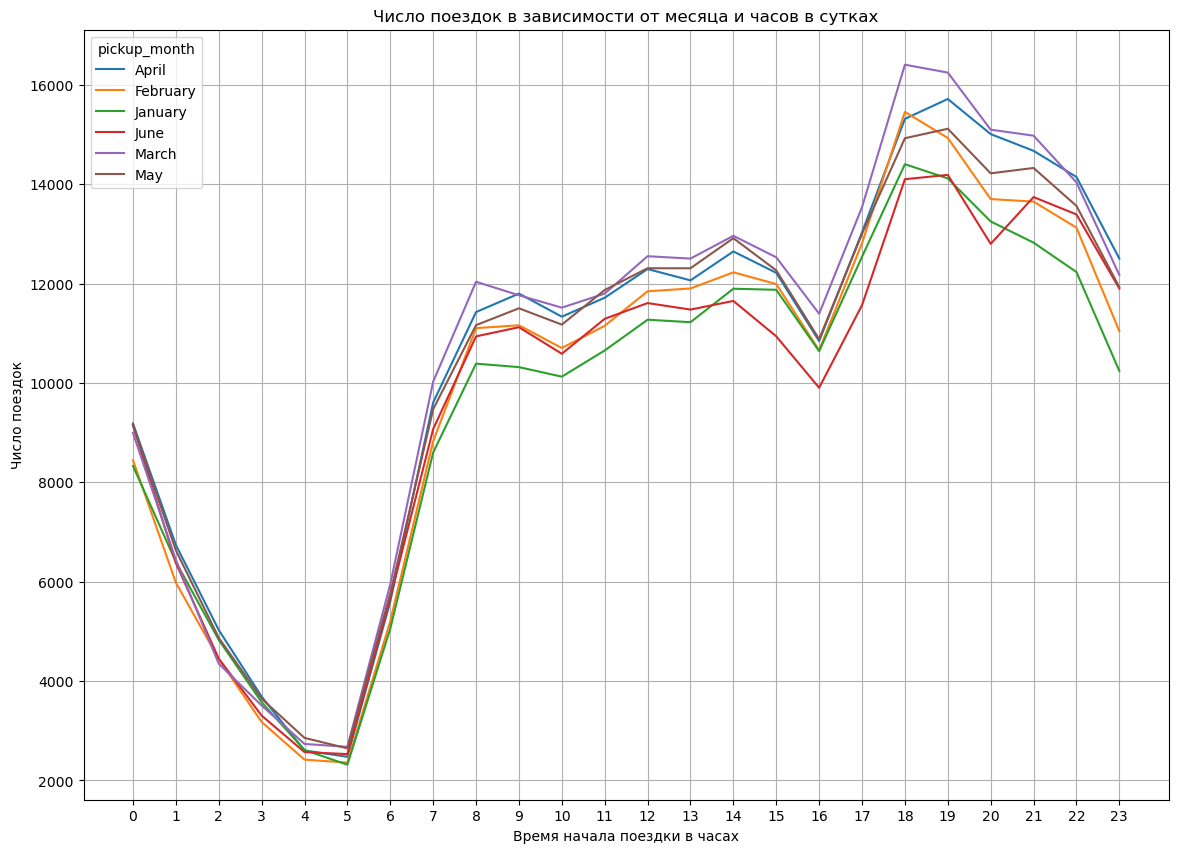

In [173]:
months = df['pickup_datetime'].dt.strftime('%B').to_frame().sort_index()
hours = df['pickup_datetime'].dt.hour.to_frame().sort_index()
months = pd.concat([months, hours], axis=1)
months.columns = ['pickup_month', 'pickup_time']
months = months.value_counts().to_frame().reset_index().sort_values(by='pickup_month')
plt.figure(figsize=(14,10)) 
sns.lineplot(data=months, x='pickup_time', y='count', hue='pickup_month')
plt.xticks(np.arange(0, 24, step=1))
plt.title('Число поездок в зависимости от месяца и часов в сутках')
plt.xlabel('Время начала поездки в часах')
plt.ylabel('Число поездок')
plt.grid()
plt.show()

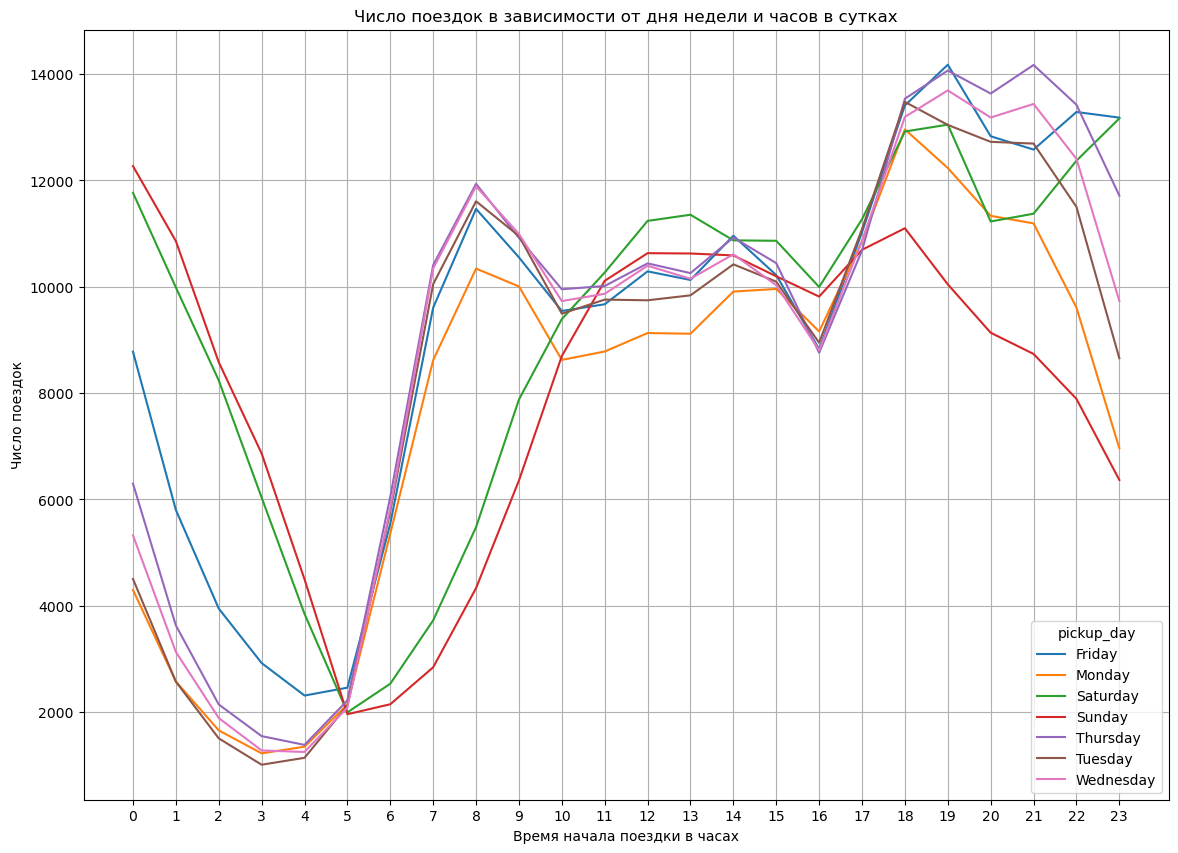

In [207]:
dates = df['pickup_datetime'].dt.day_name().to_frame().sort_index()
hours = df['pickup_datetime'].dt.hour.to_frame().sort_index()
dates = pd.concat([dates, hours], axis=1)
dates.columns = ['pickup_day', 'pickup_time']
dates = dates.value_counts().to_frame().reset_index().sort_values(by='pickup_day')
plt.figure(figsize=(14,10)) 
sns.lineplot(data=dates, x='pickup_time', y='count', hue='pickup_day')
plt.xticks(np.arange(0, 24, step=1))
plt.title('Число поездок в зависимости от дня недели и часов в сутках')
plt.xlabel('Время начала поездки в часах')
plt.ylabel('Число поездок')
plt.grid()
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

По графику в зависимости от месяца: самые загруженные часы - 18-22, при этом максимальное количество в 18 часов (что неудивительно, это час пик, далее часы загруженные, т.к. все добираются домой, кто-то раньше, кто-то позже). Минимально загруженные часы: 4-5 утра (в большинстве случаев в это время все спят). Самый загруженный месяц - март, а самый незагруженный - июнь и январь. Так как в июне уже теплая погода, люди начинают реже брать такси, а в марте бывают дожди, в связи с чем спрос на поездки увеличивается. А в январе низкий спрос из-за новогодних каникул и праздников.

По второму графику: В будние дни ситуация выглядит примерно одинаково: спрос резко увеличивается в 6 утра, когда люди начинают ехать на работу, до этого он плавно падает и в 5 утра достигает своего минимума. Далее спрос вырастает в 18 часов, и затем плавно снижается, при этом в пятницу вечером он опять вырастает к 22 часам, потому что это конец рабочей недели, люди идут отдыхать. Суббота-воскресенье устроены иначе: в 0 часов спрос еще высокий, затем он падает, при этом в 6 утра он уже так резко не поднимается, так как это нерабочие дни. В субботу он поднимается вечером (люди опять едут отдыхать), а в воскресенье уже такого нет, так как в понедельник на работу.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [243]:
from sklearn.model_selection import train_test_split
X = df.drop(['log_trip_duration'], axis=1)
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.loc[:,'log_trip_duration'] = y_train

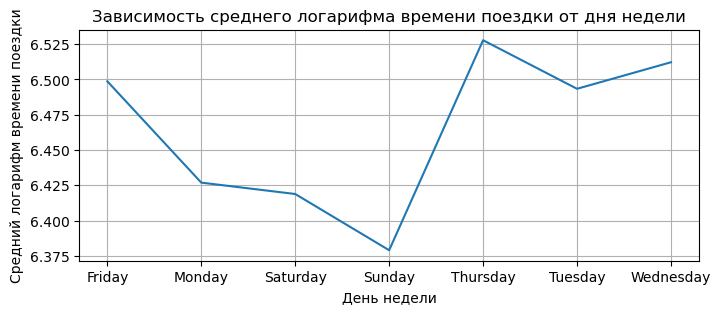

In [241]:
weekdays = X_train.groupby(X_train['pickup_datetime'].dt.day_name())['log_trip_duration'].mean().to_frame().reset_index()
plt.figure(figsize=(8,3)) 
sns.lineplot(data=weekdays, x='pickup_datetime', y='log_trip_duration')
plt.title('Зависимость среднего логарифма времени поездки от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм времени поездки')
plt.grid()
plt.show()

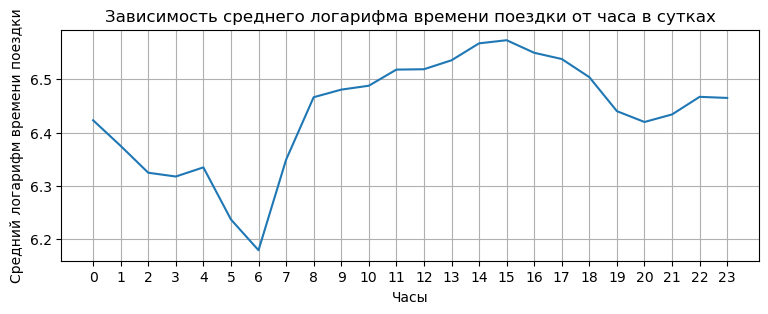

In [203]:
hours = X_train.groupby(X_train['pickup_datetime'].dt.hour)['log_trip_duration'].mean().to_frame().reset_index()
plt.figure(figsize=(9,3)) 
sns.lineplot(data=hours, x='pickup_datetime', y='log_trip_duration')
plt.xticks(np.arange(0, 24, step=1))
plt.title('Зависимость среднего логарифма времени поездки от часа в сутках')
plt.xlabel('Часы')
plt.ylabel('Средний логарифм времени поездки')
plt.grid()
plt.show()

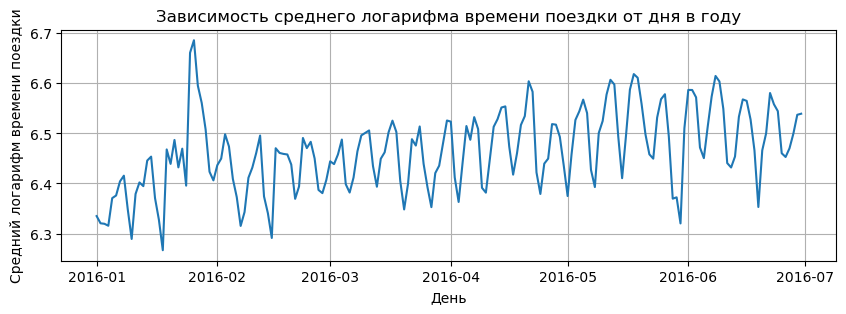

In [205]:
days = X_train.groupby(X_train['pickup_datetime'].dt.date)['log_trip_duration'].mean().to_frame().reset_index()
plt.figure(figsize=(10,3)) 
sns.lineplot(data=days, x='pickup_datetime', y='log_trip_duration')
plt.title('Зависимость среднего логарифма времени поездки от дня в году')
plt.xlabel('День')
plt.ylabel('Средний логарифм времени поездки')
plt.grid()
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Графики похожи для часов в сутках, а для дней недели - нет. Для дней недели они разные, так как в выходные меньше пробок и длительность поездок меньше, а вот количество большое. Во время пробок многие выбирают поездку на общественном транспорте, поэтому количество снижается, но средняя продолжительность поездки от этого не меняется. С часами же другая ситуация: в 5 утра и желаюих взять такси мало, и пробок нет. А вот в час пик количество желающих увеличивается, но и время поездки тоже долгое из-за пробок.

В период 23-25 января средний таргет очень резко вырастает, так как из-за снегопада время поездки было очень долгим. А вот 29-30 мая средний таргет очень низкий, так как день памяти, вероятнее всего, нерабочий, и пробок не было.

Скачки на графике происходят, так как в будние дни среднее время поездки больше, чем в выходные, поэтому трендщ зависимости от номера дня в году наблюдается.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [235]:
def anomaly_1(x):
  return ((x['pickup_datetime'].month == 1) & ((x['pickup_datetime'].day == 23) | (x['pickup_datetime'].day == 24) | (x['pickup_datetime'].day == 25)))

def anomaly_2(x):
  return ((x['pickup_datetime'].month == 5) & ((x['pickup_datetime'].day == 29) | (x['pickup_datetime'].day == 30)))
    

In [237]:
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.strftime('%B')
df['hour'] = df['pickup_datetime'].dt.hour
df['anomaly_1'] = df.apply(anomaly_1, axis=1)
df['anomaly_2'] = df.apply(anomaly_2, axis=1)
df['day'] = df['pickup_datetime'].dt.day
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration day_of_week  \
0               40.765602                  N           6.122493      Monday   
1               40.731152                  N           6.498282      Sunday   
2               40.710087                  N           7.661527     Tuesday   
3               40.706718                  N           6.063785   Wednesday   
4               40.782520                  N           6.077642    Saturday   
...                   ...                ...                ...         ...   
1458639         40.740170                  N           6.658011      Friday   
1458640         40.796547                  N           6.486161      Sunday   
1458641         40.707371                  N           6.639876      Friday   
1458642         40.757107                  N           5.924256     Tuesday   
1458643         40.790585                  N           5.293305     Tuesday   

           month  hour  anomaly_1  anomaly_2  day  
0          March    17      False      False   14  
1           June     0      False      False   12  
2        January    11      False      False   19  
3          April    19      False      False    6  
4          March    13      False      False   26  
...          ...   ...        ...        ...  ...  
1458639    April    13      False      False    8  
1458640  January     7      False      False   10  
1458641    April     6      False      False   22  
1458642  January    15      False      False    5  
1458643    April    14      False      False    5  

[1458644 rows x 16 columns]

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Я считаю, что все эти признаки являются категориальными, так как дни или часы не значат ничего "численно", это именно категории, на которые мы можем разделить (к тому же, чисел ограниченное количество, будет нецелесообразно считать их числовыми признаками).

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [245]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(['log_trip_duration', 'id'], axis=1)
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

categorical_features = ['day_of_week', 'month', 'hour', 'anomaly_1', 'anomaly_2', 'day']
numeric_features = [] # ничего не масштабируем
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[np.concatenate([categorical_features, numeric_features])], y_train) #используем только признаки, данные в этой части задания
y_pred = model.predict(X_test[np.concatenate([categorical_features, numeric_features])])
print("Test RLMSE = %.4f" % rmsle(y_test, y_pred))

Test RLMSE = 0.7864


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [247]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [249]:
your_lat_values = df.sample(1000)['pickup_latitude']
your_lon_values = df.sample(1000)['pickup_longitude']

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Наиболее выделяется скопление точек в районе Манхэтенна, это загруженный и популярный центральный район Нью-Йорка. Его особенность в том, что в нем очень много разных по времени поездок, так как в часы пик там сильные пробки. Также можем заметить скопление точек в районе аэропорта La Guardia. Это нам будет полезно, чтобы анализировать поездки на дальние расстояния, так как из аэропорта чаще всего едут в город.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [261]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df.loc[:, 'distance_haversine'] = haversine_array(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values, df['dropoff_longitude'].values)
X_train.loc[:, 'distance_haversine'] = haversine_array(X_train['pickup_latitude'].values, X_train['pickup_longitude'].values, X_train['dropoff_latitude'].values, X_train['dropoff_longitude'].values)
X_test.loc[:, 'distance_haversine'] = haversine_array(X_test['pickup_latitude'].values, X_test['pickup_longitude'].values, X_test['dropoff_latitude'].values, X_test['dropoff_longitude'].values)


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [263]:
df['log_haversine'] = np.log1p(df['distance_haversine'])
X_train['log_haversine'] = np.log1p(X_train['distance_haversine'])
X_test['log_haversine'] = np.log1p(X_test['distance_haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [258]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['distance_haversine'].corr(your_df['log_trip_duration'])

ошибки нет, все супер

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

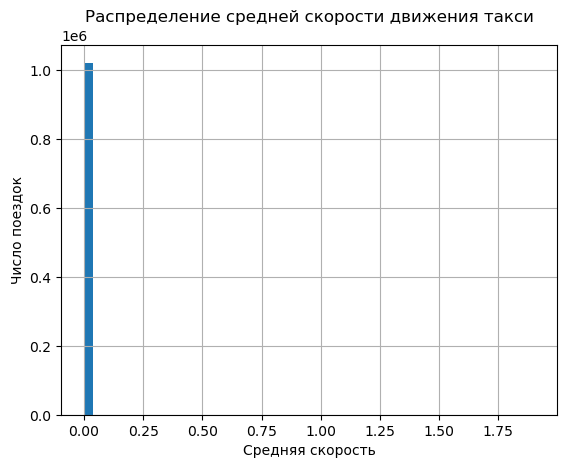

In [267]:
train = pd.concat([X_train, y_train], axis=1)
train['av_speed'] = train['distance_haversine'] / np.exp(train['log_trip_duration'])
plt.hist(train['av_speed'].values, bins=50)
plt.title('Распределение средней скорости движения такси')
plt.xlabel('Средняя скорость')
plt.ylabel('Число поездок')
plt.grid()
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

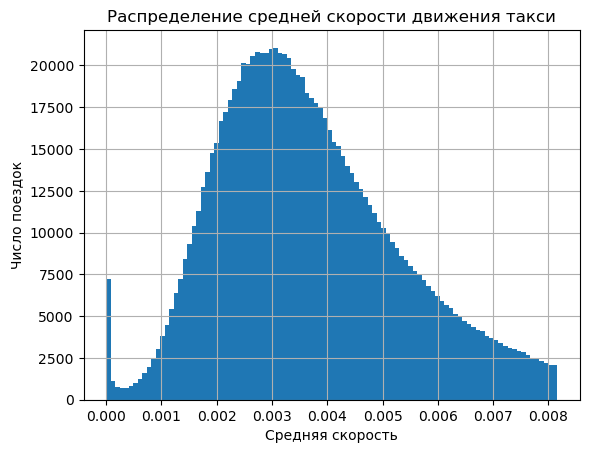

In [271]:
quantile = train['av_speed'].quantile(0.95)
filtered_speed = train[train['av_speed']<quantile]
plt.hist(filtered_speed['av_speed'].values, bins=100)
plt.title('Распределение средней скорости движения такси')
plt.xlabel('Средняя скорость')
plt.ylabel('Число поездок')
plt.grid()
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

Text(120.72222222222221, 0.5, 'Время в часах')

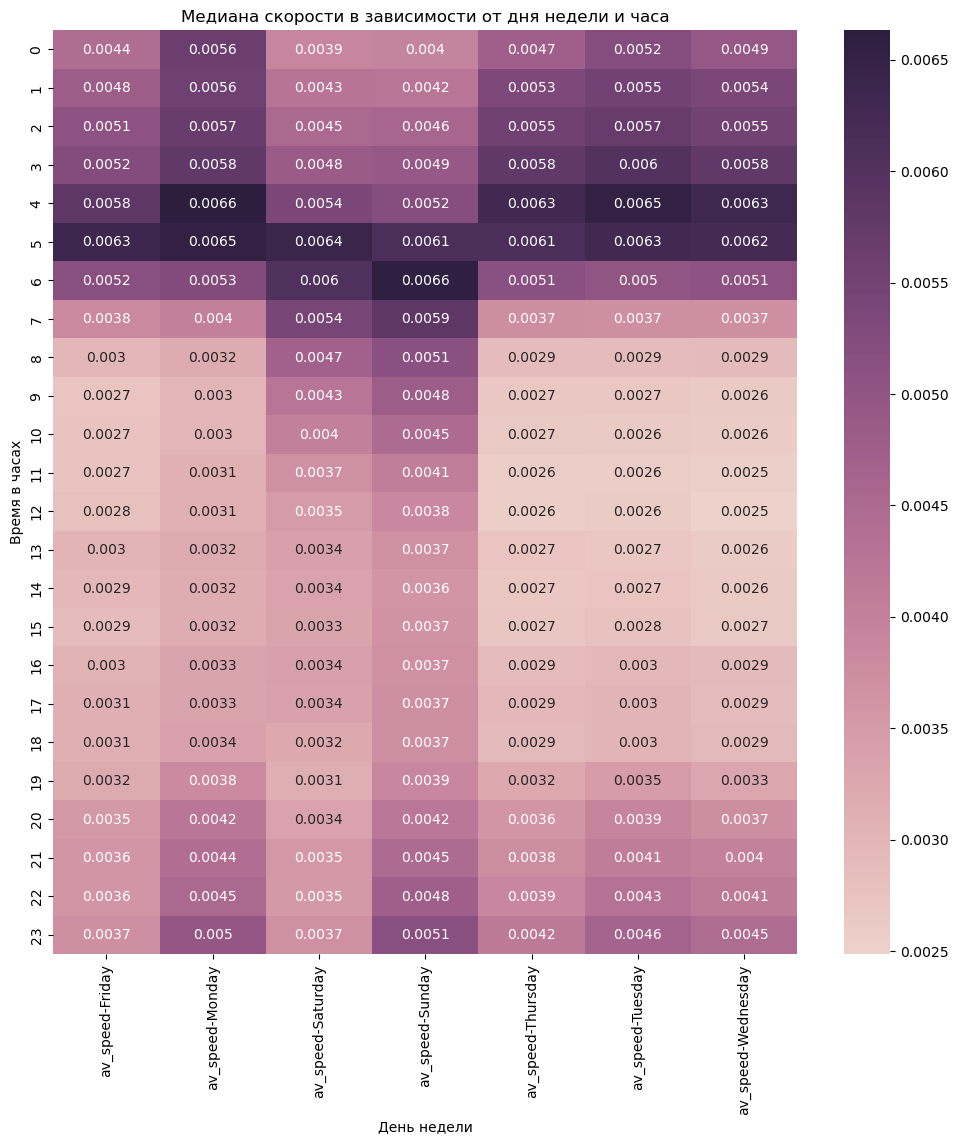

In [275]:
median = train.groupby(['day_of_week', 'hour'])['av_speed'].median().to_frame()
median = median.unstack(level=0)

plt.figure(figsize=(12, 12))
sns.heatmap(median, cmap=sns.cubehelix_palette(as_cmap=True), annot=True) 
plt.title('Медиана скорости в зависимости от дня недели и часа')
plt.xlabel('День недели')
plt.ylabel('Время в часах') 

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Мы получили скорость из расстояния и времени поездки, а значит скорость коррелирует с этими переменными, в результате чего может возникнуть переобучение.

In [280]:
train.drop(['av_speed'], axis=1, inplace=True) #вообще можно было забить, так как это отдельный датасет, в самом датасете нет скорости

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Скорость максимальна ночью - ранним утром, в будние дни это 3-5 утра, в выходные это 5-7. Минимальная скорость примерно с 9 до 18 в будние дни.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [284]:
working_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df['traffic'] = ((df['hour'] >= 9) & (df['hour'] <= 18) & (df['day_of_week'].isin(working_days))).astype(int)
df['free_roads'] = (((df['hour'] >= 3) & (df['hour'] <= 5) & (df['day_of_week'].isin(working_days))) | 
                    ((df['hour'] >= 5) & (df['hour'] <= 7) & (~df['day_of_week'].isin(working_days)))).astype(int)
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration day_of_week  \
0               40.765602                  N           6.122493      Monday   
1               40.731152                  N           6.498282      Sunday   
2               40.710087                  N           7.661527     Tuesday   
3               40.706718                  N           6.063785   Wednesday   
4               40.782520                  N           6.077642    Saturday   
...                   ...                ...                ...         ...   
1458639         40.740170                  N           6.658011      Friday   
1458640         40.796547                  N           6.486161      Sunday   
1458641         40.707371                  N           6.639876      Friday   
1458642         40.757107                  N           5.924256     Tuesday   
1458643         40.790585                  N           5.293305     Tuesday   

           month  hour  anomaly_1  anomaly_2  day  distance_haversine  \
0          March    17      False      False   14            1.498521   
1           June     0      False      False   12            1.805507   
2        January    11      False      False   19            6.385098   
3          April    19      False      False    6            1.485498   
4          March    13      False      False   26            1.188588   
...          ...   ...        ...        ...  ...                 ...   
1458639    April    13      False      False    8            1.225080   
1458640  January     7      False      False   10            6.049836   
1458641    April     6      False      False   22            7.824606   
1458642  January    15      False      False    5            1.092564   
1458643    April    14      False      False    5            1.134042   

         log_haversine  traffic  free_roads  
0             0.915699        1           0  
1             1.031584        0           0  
2             1.999464        1           0  
3             0.910473        0           0  
4             0.783257        0           0  
...                ...      ...         ...  
1458639       0.799793        1           0  
1458640       1.953004        0           1  
1458641       2.177544        0           0  
1458642       0.738390        1           0  
1458643       0.758018        1           0  

[1458644 rows x

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны? отвечала в предыдущем пункте

In [293]:
manh_1_lat = 40.777397 # широта первой точки Манхэттена
manh_1_long = -73.980118 # долгота
manh_2_lat = 40.731719 # вторая точка 
manh_2_long = -73.977247
#для аэропорта:
airport_1_lat = 40.775652 
airport_1_long = -73.868043
airport_2_lat = 40.759089
airport_2_long = -73.878171

df = df.assign(start_manh=lambda x: (((manh_2_lat <= x['pickup_latitude']) & (manh_1_lat >= x['pickup_latitude'])) &
                                          ((manh_1_long <= x['pickup_longitude']) & (manh_2_long >= x['pickup_longitude']))))
df = df.assign(end_manh=lambda x: (((manh_2_lat <= x['dropoff_latitude']) & (manh_1_lat >= x['dropoff_latitude'])) &
                                          ((manh_1_long <= x['dropoff_longitude']) & (manh_2_long >= x['dropoff_longitude']))))
df = df.assign(start_airport=lambda x: (((airport_2_lat <= x['pickup_latitude']) & (airport_1_lat >= x['pickup_latitude'])) &
                                          ((airport_2_long <= x['pickup_longitude']) & (airport_1_long >= x['pickup_longitude']))))
df = df.assign(end_airport=lambda x: (((airport_2_lat <= x['dropoff_latitude']) & (airport_1_lat >= x['dropoff_latitude'])) &
                                          ((airport_2_long <= x['dropoff_longitude']) & (airport_1_long >= x['dropoff_longitude']))))

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

/var/folders/b6/z9pk_jnd7938z7cl0bfqn8480000gn/T/ipykernel_96192/1143011725.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


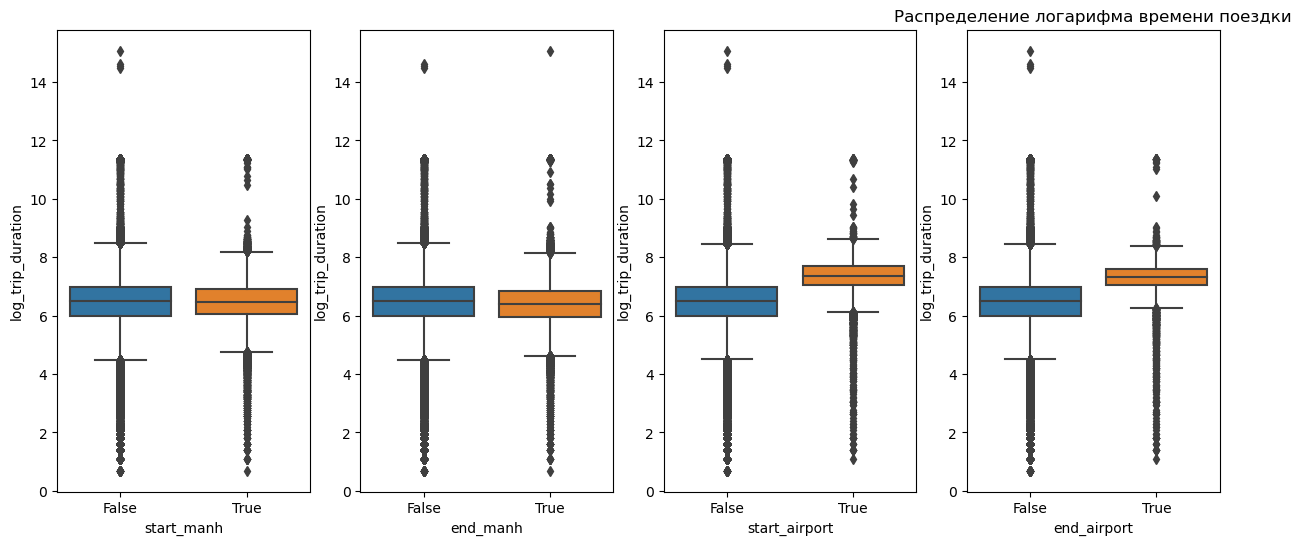

In [297]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
for i, j in enumerate(["start_manh", "end_manh", "start_airport", "end_airport"]):
    sns.boxplot(x=j, y="log_trip_duration", data=df, ax=axes[i])
plt.title('Распределение логарифма времени поездки')
fig.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Признаки получились не очень хорошими, так как для Манхэттена распределение времени примерно одинаковое, для аэропорта тоже не сильно различается, а также много выбросов

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [300]:
point_1 = (40.708185, -74.018094) #левая нижняя точка
point_2 = (40.797052, -73.937611) #правая верхняя точка

In [316]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, point_1, point_2, rows, cols):
        self.point_1 = point_1
        self.point_2 = point_2
        self.rows = rows
        self.cols = cols
        self.rectangles = []

    def calculate_rectangles(self):
        self.rectangles = []
        x_step = (self.point_2[0] - self.point_1[0]) / self.cols
        y_step = (self.point_2[1] - self.point_1[1]) / self.rows

        for i in range(self.rows):
            for j in range(self.cols):
                p1_x = x_step * j + self.point_1[0]
                p1_y = y_step * i + self.point_1[1]
                p2_x = p1_x + x_step
                p2_y = p1_y + y_step
                self.rectangles.append(((p1_x, p1_y), (p2_x, p2_y)))

    def show_map(self, data, lat_col, long_col, color_col):
        colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple', 'Brown', 'Pink', 'Black', 'Olive', 'Aquamarine', 'Violet']
        self.calculate_rectangles()
        av_loc = data[lat_col].mean(), data[long_col].mean()
        av_map = folium.Map(location=av_loc)
        for rect in self.rectangles:
            folium.Rectangle(bounds=[rect[0], rect[1]], fill_opacity=0.8).add_to(av_map)
            
        for _, row in data.iterrows():
            lat, long, color = row[lat_col], row[long_col], colors[row[color_col]]
            folium.CircleMarker(
                location=[lat, long],
                radius=6,
                color=color,
            ).add_to(av_map)
        for rect in self.rectangles:
            folium.Rectangle(bounds=[rect[0], rect[1]], fill_opacity=0.7).add_to(av_map)

        return av_map

    def fit(self, X=None, y=None):
        return self

    def transform(self, X, y=None):
        self.calculate_rectangles()
        X_transformed = X.copy()
        X_transformed['pickup_loc'] = -1 
        X_transformed['dropoff_loc'] = -1
        for i in range(self.cols * self.rows):
            pickup = ((self.rectangles[i][1][0] > X_transformed['pickup_latitude']) & (X_transformed['pickup_latitude'] > 
                        self.rectangles[i][0][0]) & (self.rectangles[i][1][1] > X_transformed['pickup_longitude']) & 
                        (X_transformed['pickup_longitude'] > self.rectangles[i][0][1]))
            dropoff = ((self.rectangles[i][1][0] > X_transformed['dropoff_latitude']) & (X_transformed['dropoff_latitude'] > 
                        self.rectangles[i][0][0]) & (self.rectangles[i][1][1] > X_transformed['dropoff_longitude']) & 
                        (X_transformed['dropoff_longitude'] > self.rectangles[i][0][1]))
            X_transformed.loc[pickup, "pickup_loc"] = i
            X_transformed.loc[dropoff, "dropoff_loc"] = i
        
        return X_transformed

In [320]:
X = df.drop(['log_trip_duration', 'id'], axis=1)
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

transformer = MapGridTransformer(point_1, point_2, 4, 3)
X_train_ = X_train.sample(5000)
X_transformed = transformer.transform(X_train_)
Map = transformer.show_map(X_transformed, 'pickup_latitude', 'pickup_longitude', 'pickup_loc')
Map

In [322]:
df = transformer.transform(df)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [330]:
categorical_features = ['day_of_week', 'month', 'hour', 'anomaly_1', 'anomaly_2', 'day', 'traffic', 'free_roads', 
                        'start_manh', 'end_manh', 'start_airport', 'end_airport', 'pickup_loc', 'dropoff_loc']
numeric_features = ['log_haversine'] # это численный признак, остальные категориальные
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(X_train[np.concatenate([categorical_features, numeric_features])], y_train)
y_pred = model.predict(X_test[np.concatenate([categorical_features, numeric_features])])
print("RLMSE = %.4f" % rmsle(y_test, y_pred))

RLMSE = 0.4781


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным. 

Я думаю, что самым полезным признаком мог оказаться passenger_count, так как количество пассажиров может повлиять на время поездки (например, если развозить компанию по нескольким точкам)

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [335]:
vendor_id_unique = df['vendor_id'].unique()
passenger_count_unique = df['passenger_count'].unique()
store_and_fwd_flag_unique = df['store_and_fwd_flag'].unique()
print('vendor_id:', len(vendor_id_unique), vendor_id_unique)
print('passenger_count:', len(passenger_count_unique), passenger_count_unique)
print('store_and_fwd_flag:', len(store_and_fwd_flag_unique), store_and_fwd_flag_unique)

vendor_id: 2 [2 1]
passenger_count: 10 [1 6 4 2 3 5 0 7 9 8]
store_and_fwd_flag: 2 ['N' 'Y']


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

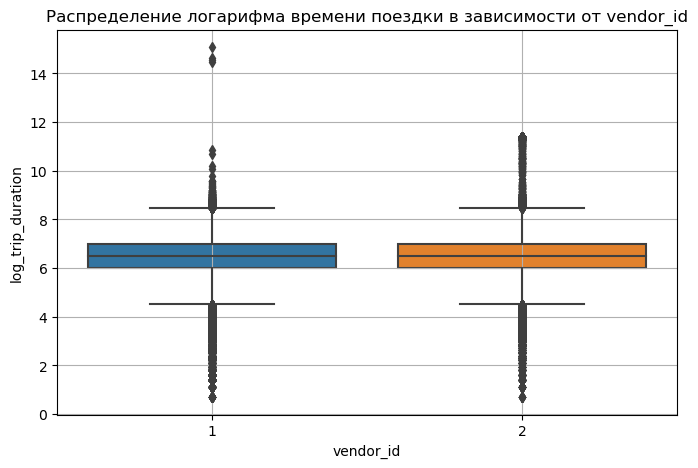

In [341]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['vendor_id'], y=df['log_trip_duration'], data=df)
plt.title('Распределение логарифма времени поездки в зависимости от vendor_id')
plt.grid()
plt.show()

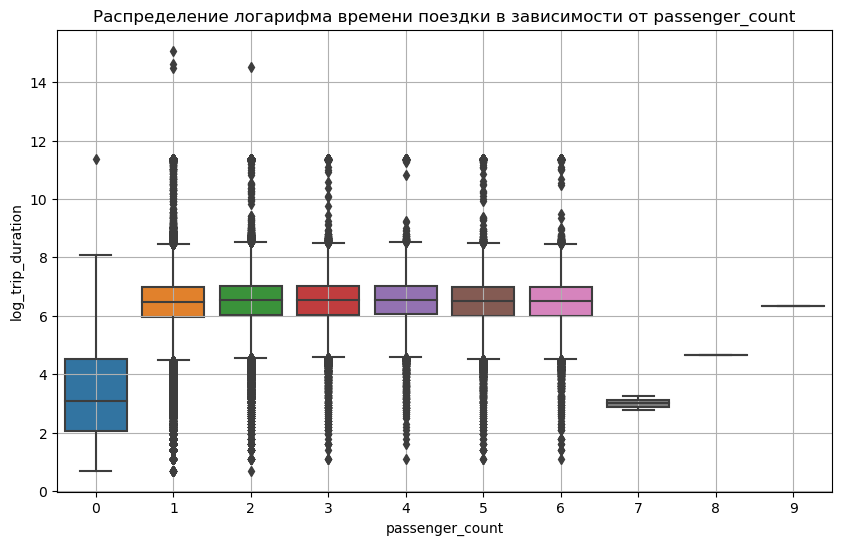

In [345]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['passenger_count'], y=df['log_trip_duration'], data=df)
plt.title('Распределение логарифма времени поездки в зависимости от passenger_count')
plt.grid()
plt.show()

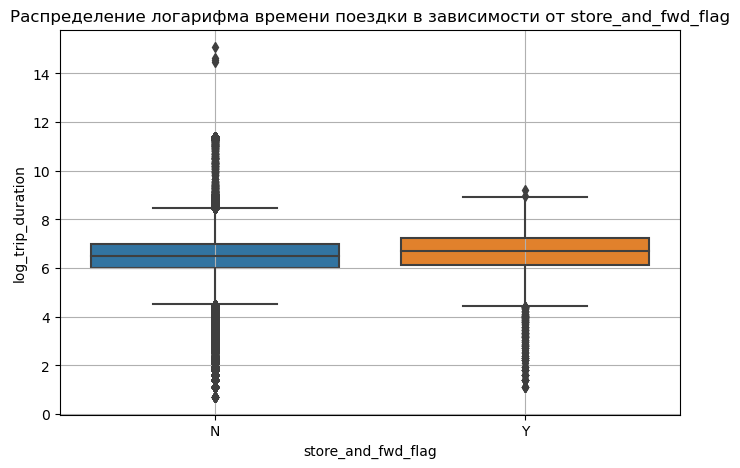

In [347]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['store_and_fwd_flag'], y=df['log_trip_duration'], data=df)
plt.title('Распределение логарифма времени поездки в зависимости от store_and_fwd_flag')
plt.grid()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [349]:
df.loc[df['vendor_id'] == 1, 'vendor_id'] = 0
df.loc[df['vendor_id'] == 2, 'vendor_id'] = 1
df.loc[df['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0
df.loc[df['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Я думаю, что нет, так как распределение у каждого признака для двух значений примерно одинаковое, а значит признак не сильно важен

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [356]:
X = df.drop(['log_trip_duration', 'id'], axis=1)
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [358]:
categorical_features = ['day_of_week', 'month', 'hour', 'anomaly_1', 'anomaly_2', 'day', 'traffic', 'free_roads', 
                        'start_manh', 'end_manh', 'start_airport', 'end_airport', 'pickup_loc', 'dropoff_loc', 
                       'vendor_id', 'passenger_count', 'store_and_fwd_flag']
numeric_features = ['log_haversine'] # это численный признак, остальные категориальные
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(X_train[np.concatenate([categorical_features, numeric_features])], y_train)
y_pred = model.predict(X_test[np.concatenate([categorical_features, numeric_features])])
print("RLMSE = %.4f" % rmsle(y_test, y_pred))

RLMSE = 0.4777


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Ошибка в предыдущей регрессии была совсем немного больше: на $0,0004$, а значит можем выбросить эти метрики из данных

In [362]:
X_train = X_train.drop(['vendor_id'], axis=1)
X_test = X_test.drop(['vendor_id'], axis=1)
df = df.drop(['vendor_id'], axis=1)

X_train = X_train.drop(['passenger_count'], axis=1)
X_test = X_test.drop(['passenger_count'], axis=1)
df = df.drop(['passenger_count'], axis=1)

X_train = X_train.drop(['store_and_fwd_flag'], axis=1)
X_test = X_test.drop(['store_and_fwd_flag'], axis=1)
df = df.drop(['store_and_fwd_flag'], axis=1)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

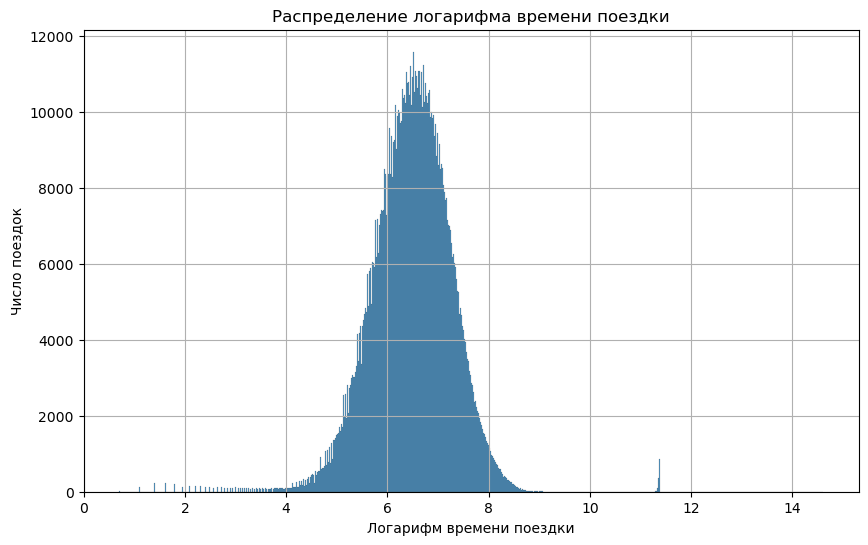

In [370]:
plt.figure(figsize=(10,6))
sns.histplot(y_train)
plt.title('Распределение логарифма времени поездки')
plt.grid()
plt.xlabel('Логарифм времени поездки')
plt.ylabel('Число поездок')
plt.show()

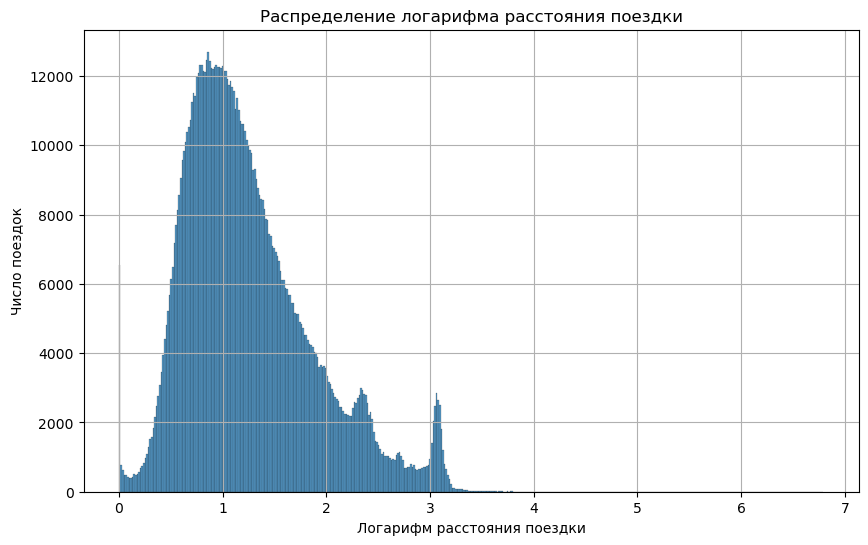

In [372]:
plt.figure(figsize=(10,6))
sns.histplot(X_train['log_haversine'])
plt.title('Распределение логарифма расстояния поездки')
plt.grid()
plt.xlabel('Логарифм расстояния поездки')
plt.ylabel('Число поездок')
plt.show()

In [378]:
categorical_features = ['day_of_week', 'month', 'hour', 'anomaly_1', 'anomaly_2', 'day', 'traffic', 'free_roads', 
                        'start_manh', 'end_manh', 'start_airport', 'end_airport', 'pickup_loc', 'dropoff_loc']
numeric_features = ['log_haversine'] # это численный признак, остальные категориальные
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(X_train[np.concatenate([categorical_features, numeric_features])], y_train)
y_pred = model.predict(X_train[np.concatenate([categorical_features, numeric_features])])

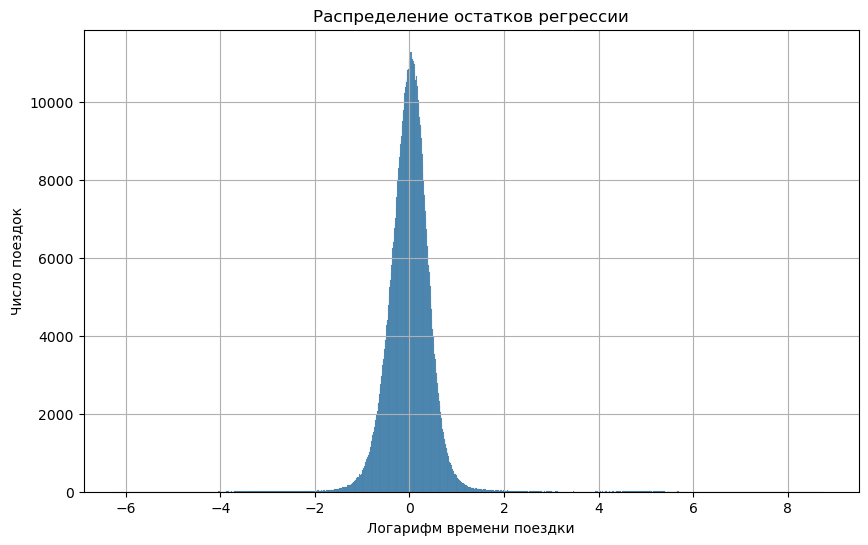

In [382]:
plt.figure(figsize=(10,6))
sns.histplot(y_train - y_pred) #это остатки
plt.title('Распределение остатков регрессии')
plt.grid()
plt.xlabel('Логарифм времени поездки')
plt.ylabel('Число поездок')
plt.show()

In [415]:
df = df[df['log_trip_duration'] >= 3.5]
df = df[df['log_haversine'] <= 3.7]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

Давайте объединим две аномалии в одну:

In [403]:
df['anomaly'] = (df['anomaly_1'] | df['anomaly_2']).astype(int)
X_train['anomaly'] = (X_train['anomaly_1'] | X_train['anomaly_2']).astype(int)
X_test['anomaly'] = (X_test['anomaly_1'] | X_test['anomaly_2']).astype(int)

In [411]:
df = df.drop(['anomaly_1', 'anomaly_2'], axis=1)
X_train = X_train.drop(['anomaly_1', 'anomaly_2'], axis=1)
X_test = X_test.drop(['anomaly_1', 'anomaly_2'], axis=1)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [417]:
X = df.drop(['log_trip_duration', 'id'], axis=1)
y = df['log_trip_duration']
X_train, X_test_1, y_train, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=0) #тестовые данные должны быть неочищенны

categorical_features = ['day_of_week', 'month', 'hour', 'anomaly', 'day', 'traffic', 'free_roads', 
                        'start_manh', 'end_manh', 'start_airport', 'end_airport', 'pickup_loc', 'dropoff_loc']
numeric_features = ['log_haversine'] # это численный признак, остальные категориальные
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(X_train[np.concatenate([categorical_features, numeric_features])], y_train)
y_pred = model.predict(X_test[np.concatenate([categorical_features, numeric_features])])
print("RLMSE = %.4f" % rmsle(y_test, y_pred))

RLMSE = 0.4794


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [421]:
print("До кодирования категориальных признаков:", len(categorical_features) + 1)
print("После кодирования категориальных признаков:", column_transformer.transform(X_train).shape[1])

До кодирования категориальных признаков: 14
После кодирования категориальных признаков: 109


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [423]:
from sklearn.linear_model import Lasso

categorical_features = ['day_of_week', 'month', 'hour', 'anomaly', 'day', 'traffic', 'free_roads', 
                        'start_manh', 'end_manh', 'start_airport', 'end_airport', 'pickup_loc', 'dropoff_loc']
numeric_features = ['log_haversine'] # это численный признак, остальные категориальные
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])
model = pipeline.fit(X_train[np.concatenate([categorical_features, numeric_features])], y_train)
y_pred = model.predict(X_test[np.concatenate([categorical_features, numeric_features])])
print("RLMSE = %.4f" % rmsle(y_test, y_pred))

RLMSE = 0.7936


Ошибка получилась меньше на Ридж регрессии, а значит эта модель более точная, чем Лассо

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [431]:
from sklearn.model_selection import GridSearchCV

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

pipeline_r = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(pipeline_r, [{'regression__alpha': alphas}],
                         cv=4, n_jobs=-1)
searcher.fit(X_train_1, y_train_1)

best_alpha_r = searcher.best_params_['regression__alpha']
print("Best alpha = %.4f" % best_alpha_r)

Best alpha = 14.3845


In [435]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline_r = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha_r))
])

model = pipeline_r.fit(X_train_1, y_train_1)
y_pred = model.predict(X_test_1)
print("RMSlE for Ridge = %.4f" % rmsle(y_test_1, y_pred))

RMSlE for Ridge = 0.4515


In [437]:
pipeline_l = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(pipeline_l, [{'regression__alpha': alphas}],
                        scoring='neg_root_mean_squared_error', cv=4, n_jobs=-1)
searcher.fit(X_train_1, y_train_1)

best_alpha_l = searcher.best_params_['regression__alpha']
print("best alpha = %.4f" % best_alpha_l)

python(38156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


best alpha = 0.0100


In [439]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline_l = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha_l))
])

model = pipeline_l.fit(X_train_1, y_train_1)
y_pred = model.predict(X_test_1)
print("RMSlE for Lasso = %.4f" % rmsle(y_test_1, y_pred))

RMSlE for Lasso = 0.4725


Сохраните наилучшее значение, как бенчмарк на будущее

In [441]:
best_rmsle = 0.4515

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

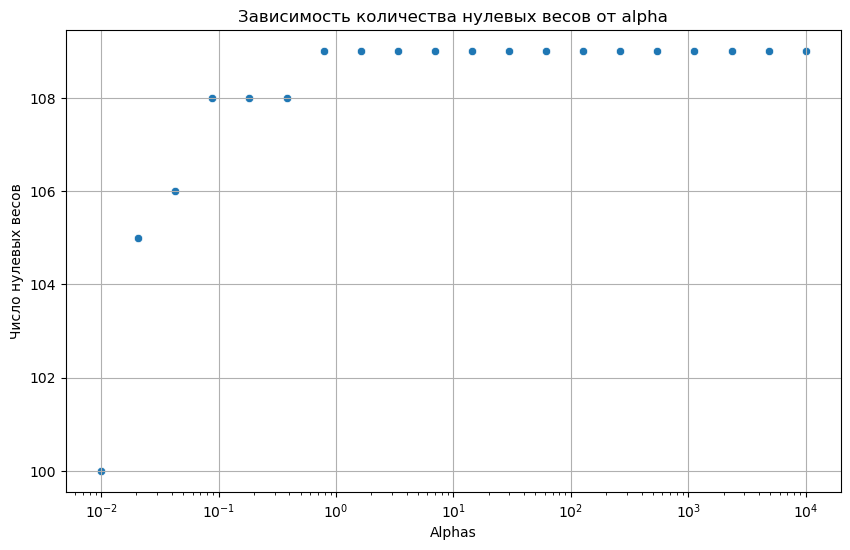

In [444]:
nulls = []
for alpha in alphas:
    pipeline_l = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha=alpha))
    ])
    model = pipeline_l.fit(X_train_1, y_train_1)
    coefs = model.named_steps['regression'].coef_
    nulls.append(len(coefs[coefs == 0]))
    
plt.figure(figsize=(10, 6))
sns.scatterplot(x=alphas, y=nulls)
plt.xscale('log')
plt.title('Зависимость количества нулевых весов от alpha')
plt.grid()
plt.xlabel('Alphas')
plt.ylabel('Число нулевых весов')
plt.show()

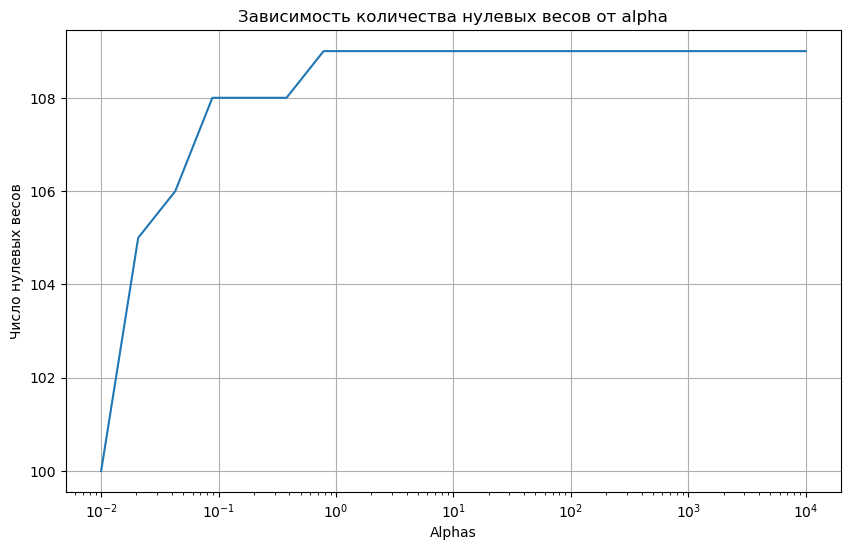

In [448]:
#сделаю еще lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x=alphas, y=nulls)
plt.xscale('log')
plt.title('Зависимость количества нулевых весов от alpha')
plt.grid()
plt.xlabel('Alphas')
plt.ylabel('Число нулевых весов')
plt.show()

при alpha чуть меньше, чем $10^0$ и дальше, все признаки нулевые.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Этот признак потенциально полезен, так как он захватывает информацию о типичных маршрутах такси, что позволяет находить различные закономерности в данных, а также может повыситься точность модели. Линейная модель показывает зависимость между целевой переменной и признаками за счет коэффициентов, она не улавливает закономерности между самими признаками (в нашем случае это частота встречающихся пар, но модель улавливает линейную зависимость)

In [457]:
X_train['start_end'] = X_train['pickup_loc'].astype('str') + '_' + X_train['dropoff_loc'].astype('str')
count = X_train['start_end'].value_counts()
X_train['way'] = X_train['start_end'].apply(lambda x: x if x in count.nlargest(100).index else '-1')

In [465]:
X_test['start_end'] = X_test['pickup_loc'].astype('str') + '_' + X_test['dropoff_loc'].astype('str')
count = X_test['start_end'].value_counts()
X_test['way'] = X_test['start_end'].apply(lambda x: x if x in count.nlargest(100).index else '-1')

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [467]:
categorical_features = ['day_of_week', 'month', 'hour', 'anomaly', 'day', 'traffic', 'free_roads', 
                        'start_manh', 'end_manh', 'start_airport', 'end_airport', 'pickup_loc', 'dropoff_loc', 'way'] #start_end был вспомогательный, его не включаем
numeric_features = ['log_haversine'] 
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(X_train[np.concatenate([categorical_features, numeric_features])], y_train)
y_pred = model.predict(X_test[np.concatenate([categorical_features, numeric_features])])
print("RLMSE = %.4f" % rmsle(y_test, y_pred))

RLMSE = 0.4695


не самый лучший результат, но один из

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

я доделывала эту домашку в больнице, так что ощущения примерно такие 😵😵😵